# SPRINT5-1　RandomForest
## タイタニックの生存予測をランダムフォレストで行う

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### データ取得および読み込み

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv")

### データ確認

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### sample

In [6]:
train_df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.025,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.050,E10,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.500,NaN,S


In [7]:
train_df.sample(frac=0.05)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S


### 前処理について記述せよ

前処理とは、取り扱うデータを機械学習に適した状態に予め処理しておくこと  
前処理をしておかないと、学習ができない、学習しても良い精度が出ないといったことが生じる可能性があるので前処理は必要である。  
前処理には、  
・欠損値の補完：
    NaNとなっている箇所に何らかの値を入れておく  
　 　　　　　　　（値の決め方は、全体の平均値、min〜maxでのランダム値など）  
・特徴量エンジニアリング： 元々ある特徴量を組み合わせて新しい特徴量を作り出す  
・データ型の変換：学習モデルによっては、データ型が文字であると扱えない場合があるので  
　　　　　　　　　事前に数値に変換しておく  
　　　　　　　　　その特徴量のとる値が２つの場合は、０、１化  
　　　　　　　　　複数の値をとる場合は各値についてダミー変数化
         
・外れ値の除去：ある特徴量の値が明らかにかけ離れたものである場合は、その値をもつサンプル  
　　　　　　　　を学習に用いない  
・正規化または標準化：各特徴量の値を正規化または標準化して特徴量間のスケールの違いを  
　　　　　　　　　　　解消する  
・説明変数と従属変数との相関関係確認：従属変数と相関が強い変数と相関が弱い変数とを把握し  
　　 　　　　　　　　　　　　　　　　　学習に使用する変数を絞り込む  
・説明変数間の相関関係の確認：従属変数との相関が強い説明変数同士の相関が強い場合、  
　　　　　　　　　 　　　　　　従属変数との相関がより強い変数のみを学習に使用する

### 2/前処理について記述せよ

１、欠損値がないかを確認する  
２、使用する学習モデルに入力できる状態かを確認する(文字列を数字に置き換えておく等の処理が必要かを確認する)  
３、相関を確認する

### 前処理を行う
前処理1

In [8]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult',\
                   'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(train_df)
data_test = transform_features(test_df)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


前処理2

In [9]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
#data_train = encode_features(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


### 前処理の内容について記述せよ

#### simplify_ages  
１、欠損値を-0.5で補完する  
２、年齢を-1超０以下、０超５以下、５超１２以下、１２超１８以下、１８超２５以下、  
　 　２５超３５以下、３５超６０以下、６０超１２０以下の８つのグループに分け、  
　 　それらに名前をつける

理由：  
生存/非生存に年齢のわずかな違いは影響しないため  
この処理によって予測結果も年齢のわずかな違いには影響を受けなくなる

#### simplify_cabins  
１、欠損値をNで補完する  
２、各要素の値をその先頭文字のみにする

理由：  
先頭文字に続く数字は部屋番号であり予測には必要ないので削除する  
これでキャビンの種類ごとに数値に変換しやすくなる


#### simplify_fares  
１、欠損値をー0.５で補完する  
２、運賃を-1超０以下、０超８以下、８超１５以下、１５超３１以下、３１超１０００以下  
　　のグループに分け、それらに名前をつける

理由：  
生存/非生存に運賃のわずかな違いは影響しないため  
この処理によって予測結果も運賃のわずかな違いには影響を受けなくなる


#### format_name  
１、Name列の各要素をスペースを目印に分割した際の最初の文字列を使って  
　　Lname列を追加する  
２、Name列の各要素をスペースを目印に分割した際の２番目の文字列を使って  
　　NamePrefix列を追加する

理由：  
名前データはそのままでは予測に使えないので、その中から  
有用な情報を取り出しておく
Lname列を作ったのは、  
苗字が同じ場合、その人達は家族である可能性が高い  
→家族であれば行動を共にする可能性が高い  
→生存結果が同じになる可能性が高い  
→苗字情報は予測に使える  
と考えたためと推測される  
NamePrefix列を作ったのは、  
性別や年齢だけではわからない違いが敬称から得られるのではないか  
と考えて予測に取り入れようとしたと推測される

#### drop_features  
Ticket列、Name列、Embarked列を削除する  
  
理由：  
予測に役立たないと判断した列を削除しておくことで  
予測精度向上と学習量の低減を図る  

#### encode_features  
各列の中の文字列を数値に変換する  

理由：  
使用するモデル（ランダムフォレスト）に文字列を入力することが  
できないため

### モデル選択について記述せよ

分類に使用できる手法  
１、ロジスティック回帰   
概要：シグモイド関数を使うことで出力値が０から１の範囲になるようにしており、  
　　　この出力値を予測確率とみなし事前に設定した閾値を超えるか否かで分類を行う。  
メリット：  
　１、シグモイド関数を使用するため学習データの中に外れ値があっても大きな影響を受けない。  
　２、過学習しにくい  
　３、結果の解釈が困難ではない  
デメリット：  
　１、高い性能を発揮できるのは線形分離可能な問題に対してのみ  
　２、どうしてその結果になったかの理解は困難  
　３、特徴の次元が大きくなると性能はランダムフォレスト には劣る（決定木には勝る）

２、サポートベクターマシン  
概要：分離境界をそこに近い学習データからできるだけ遠くに設定することで、未学習データも  
　 　　高い精度で分離する。また、カーネルを使うことで線形分離できない問題にも対応する。  
メリット：  
　１、データの特徴の次元が大きくなっても識別精度が良い  
　２、最適化すべきパラメータが少ない  
　３、パラメータの算出が用意  
デメリット：  
　１、なぜその結果になったのかの理解が困難  
　２、学習データが増えると計算量が膨大になる    
　３、基本的には２クラスの分類にしか使えない

３、決定木  
概要：ある基準に従って分岐(分類)条件を決定し、データを分けることを繰り返す。  
　　　未学習データをそれらと同じ分岐(分類)条件を使って分けていき、同じ分け方を  
　　　辿ったデータを同じグループに属するデータだと予測する。  
メリット：  
　１、扱うデータの正規化・標準化が不要  
　２、モデルの構造が簡単であるため結果の理解が容易である    
　３、学習データに２値特徴量と連続値特徴量の両方が含まれていても問題なく機能する  
デメリット：  
　１、過学習が起きやすいので木の深さを慎重に決める必要がある  
　２、学習に使用するデータの属性数が多く、かつそれらの多くが目的変数と関係している場合は良い結果が得られない  
　３、特徴量が高次元になるとロジスティック回帰に劣る

４、ランダムフォレスト  
概要：決定木を複数作成し、それらの結果の多数決で予測結果を決定する。  
メリット：決定木  
　１、扱うデータの正規化・標準化が不要  
　２、パラメータチューニングをしなくても良い精度が出やすい  
　３、学習データに２値特徴量と連続値特徴量の両方が含まれていても問題なく機能する  
デメリット：  
　１、木の数が多いため、全ての木の結果を理解するのは困難である  
　２、木の数が多くなると扱うデータ量が多くなるため必要なメモリ量と計算時間が増加する  
　３、非常に高次元かつサンプル間での違いが乏しいデータに対してはうまく機能しない

### モデル選択の基準

１、特徴量の数と学習データの数の関係性（特徴量が多いのに学習データが少ない、あるいは、その逆、そして、どちらも多いかどうか）  
２、精度の高さが大事か、それとも、なぜその結果になったかを理解しやすいことが大事かのどちらを求められているか  
３、前処理の作業量と費やせる時間

### モデル選択におけるデータ可視化
import

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

barplot

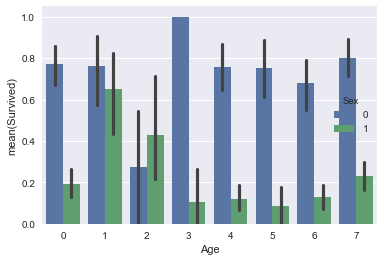

In [11]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

pointplot

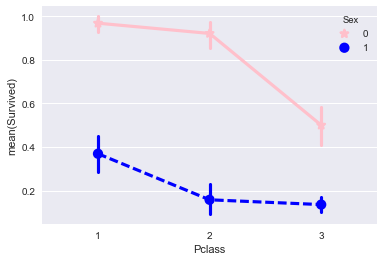

In [12]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

### データ可視化の結果について考察せよ  

１、どの年代でも女性の生存率が高い  
２、男性はBabyの生存率が高い  
３、Pclassが１,2,3の順に生存率が高い  
４、女性はPclassが３の場合生存率が低くなる  
上記の結果から、カテゴリカルデータが重要であるので、ランダムフォレスト などを選択するとよい

### データセットの分割
学習データとテストデータの比は8:2

In [13]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### ランダムフォレストについて記述せよ

・決定木   
概要：ある基準に従って分岐(分類)条件を決定し、データを分けることを繰り返す。    
　　　未学習データをそれらと同じ分岐(分類)条件を使って分けていき、同じ分け方を    
　　　辿ったデータを同じグループに属するデータだと予測する。 

・ランダムフォレスト
概要：決定木を複数作成し、それらの結果の多数決で予測結果を決定する。  
メリット：決定木  
　１、扱うデータの正規化・標準化が不要  
　２、パラメータチューニングをしなくても良い精度が出やすい  
　３、学習データに２値特徴量と連続値特徴量の両方が含まれていても問題なく機能する  
デメリット：  
　１、木の数が多いため、全ての木の結果を理解するのは困難である  
　２、木の数が多くなると扱うデータ量が多くなるため必要なメモリ量と計算時間が増加する  
　３、非常に高次元かつサンプル間での違いが乏しいデータに対してはうまく機能しない  
ランダムフォレストが適する理由：  
　今回はカテゴリカルデータをもとに分類を行うため

### 学習

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### accuracy

In [15]:
random_forest.score(X_test,y_test)

0.81564245810055869

### ハイパーパラメータについて

・ハイパーパラメータとは、モデルの性能に関わる学習パラメータのこと  
・ランダムフォレスト におけるハイパーパラメータには以下のものがある（n:データの個数）  
１、木の数  
　　存在する値：1以上 nC2以下  
　 　変化させると起こること：値を増加させると最初のうちは性能が上がるがやがて上がらなくなる  
２、木の深さ  
　　存在する値：１以上n-1以下  
　 　変化させると起こること：値を増加させると性能が上がるが過学習の度合いが高まっていく  
３、ノードに必要な最低要素数  
　　存在する値：１以上(n-1)/2以下    
　 　変化させると起こること：１にすると過学習の可能性が高まる、逆に、大き過ぎると木のノードが少なくなり未学習の可能性が高まる  
４、ノードの分割に必要な最低要素数  
　　存在する値：２以上(n-1)/2以下  
　 　変化させると起こること：１にすると過学習の可能性が高まる、逆に、大き過ぎると木のノードが少なくなり未学習の可能性が高まる 

### チューニング

In [16]:
from sklearn.model_selection import GridSearchCV

グリッドサーチを使わない場合

In [17]:
result_score = []
result_param = []
for n_estimators in list([4, 6, 9]):
    for max_features in list(['log2', 'sqrt','auto']):
        for criterion in list(['entropy', 'gini']):
            for max_depth in list([2, 3, 5, 10]):
                for min_samples_split in list([2, 3, 5]):
                    for min_samples_leaf in list([1,5,8]):
                        random_forest = RandomForestClassifier\
                                        (n_estimators = n_estimators,\
                                         max_features = max_features,\
                                         criterion = criterion,\
                                         max_depth = max_depth,\
                                         min_samples_split = min_samples_split,\
                                         min_samples_leaf = min_samples_leaf)
                        random_forest.fit(X_train, y_train)
                        result_score.append(random_forest.score(X_test, y_test))
                        result_param.append(list([n_estimators, max_features,\
                                                 criterion, max_depth, \
                                                 min_samples_split, min_samples_leaf]))

In [18]:
rs = pd.DataFrame(result_score, columns = ['score'])

In [19]:
rp = pd.DataFrame(result_param, columns = ['n_estimators', 'max_features',\
                                           'criterion', 'max_depth', \
                                           'min_samples_split', 'min_samples_leaf'])

In [20]:
rps = rs.join(rp).copy()

結果

In [21]:
rps.sort_values(by = ['score'], ascending = False)

,score,n_estimators,max_features,criterion,max_depth,min_samples_split,min_samples_leaf
99,0.849162,4,sqrt,entropy,10,2,1
106,0.843575,4,sqrt,entropy,10,5,5
282,0.843575,6,log2,gini,10,3,1
143,0.843575,4,sqrt,gini,10,5,8
532,0.843575,9,sqrt,entropy,10,2,5
606,0.843575,9,auto,entropy,10,3,1
352,0.843575,6,sqrt,gini,10,2,5
427,0.837989,6,auto,gini,10,3,5
462,0.837989,9,log2,entropy,10,3,1
603,0.837989,9,auto,entropy,10,2,1


グリッドサーチを使った場合

In [22]:
params = {'n_estimators': [4, 6, 9],'max_features': ['log2', 'sqrt','auto'],\
          'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10],\
          'min_samples_split': [2, 3, 5],'min_samples_leaf': [1,5,8]}
RF_grid = GridSearchCV(RandomForestClassifier(),params)
RF_grid.fit(X_test, y_test)
RF_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=9, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
RF_grid.best_score_

0.86033519553072624

### 検証について記述せよ

・検証とは、学習を終えたモデルが未学習データに対してどれほどの性能を示すかを確かめること  
・検証を行う必要があるのは、学習を終えたモデルが学習データに対する正解率(Accuracy)は高いものの未学習のデータに対する  
　正解率は大きく下がってしまう場合が多々あるためAccuracyだけでは実際につかえるモデルであるかどうかの判断ができないため  
・検証方法には交差検証や混合行列などがある。前者は、学習データセットを複数セットに分割し、それらの内の1セットをテストデータ  
　としてとっておき残りのデータで学習を行うが、テストデータとするセットを入れ替えながら複数回、学習・テストを繰り返し、  
　各回のテスト結果の平均と分散の値からモデルが妥当かを判断する。後者は、モデルの予測値(該当・非該当)を列、正解（該当・非該当）を  
　行に並べた行列を作り、モデルが「該当」と予測したデータにおける正解率や、正解が「該当」のデータにおける正答率などを見て検証する。

### KFoldについて記述せよ  

K-分割交差検証とは以下の内容である  
１、学習データをKセットに分割する  
２、その内1つをテストセットとしてとっておく  
３、残りのセットで学習を行い、その後、テストセットでテストを行う   
４、それまでと異なるセットをテストセットにする  
５、２から４を繰り返し、Kセット全てでテストを実施したら、  
　　全テスト(K回)の平均値と分散を求め、それらの値でモデルの妥当性を判断する  

平均値が高く分散が小さければ良いモデルと判断できる

Kの数は学習データの数に対して多すぎず少なすぎずが良い    
多すぎる場合、元の学習データのほとんどを学習することになるので当然テスト結果は高くなる  
（例えば、K=10の場合、元データの９０％を学習する）  
また、例えば目的変数が０、１の２値をとり、かつ、学習データにはそのどちらかが偏って多く  
含まれている場合は、テストセットに少ない値の方が含まれない可能性が高くなるため正しい  
テストができない  
逆に、Kが少なすぎる場合、元のデータに対する学習量が少なくなるのでテスト結果が低くなってしまう  
（例えば、K=2の場合、元データの５０％しか学習しない）

### KFoldを実施する
sklearn.model_selection.KFoldを使用して、KFoldを実施

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [49]:
rps.loc[99,'n_estimators']

4

In [57]:
indicies = KFold(n_splits = 10, random_state = 0)
Xt_np = np.array(X_train)
yt_np = np.array(y_train)
score = []
for train_ind , test_ind in indicies.split(Xt_np):
    rf = RandomForestClassifier(n_estimators = rps.loc[99,'n_estimators'],\
                                 max_features = rps.loc[99,'max_features'],\
                                 criterion = rps.loc[99,'criterion'],\
                                 max_depth = rps.loc[99,'max_depth'],\
                                 min_samples_split = rps.loc[99,'min_samples_split'],\
                                 min_samples_leaf = rps.loc[99,'min_samples_leaf'])
    rf.fit(Xt_np[train_ind],yt_np[train_ind])
    xpred = rf.predict(Xt_np[test_ind])
    score.append(accuracy_score(yt_np[test_ind,],xpred))


0.813145539906 0.034773601476


### Kfoldの結果を確認する


In [58]:
score= np.array(score)
print(score.mean(),score.std())

0.813145539906 0.034773601476


### どの特徴量が重要であったかを調査する

In [80]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns.values)\
  .sort_values(by=0,ascending=False)

,0
Lname,0.264090
Sex,0.171556
NamePrefix,0.146848
Pclass,0.105505
Age,0.084683
SibSp,0.069024
Cabin,0.060643
Fare,0.055356
Parch,0.042295


Lnameが最も重要であった